# Network Experiment Design

This shows an example of generating network designs where you spread out the treated in a way to get a certain sample size for the spillover and leftover. This uses a linear program under the hood, where you set the number of treated, have a constraint on the leftover sample size (so not touched directly or within one step of a treated unit), and maximize the number of spillovers.

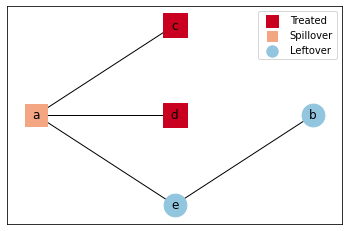

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import nxdesign as nxd
import pandas as pd

# Creating a simple network
Nodes = ['a','b','c','d','e']
Edges = [('a','c'),
         ('a','d'),
         ('a','e'),
         ('b','e')]

G = nx.Graph()
G.add_edges_from(Edges)

# Now solving for different number of treated selected
ch = nxd.netDesign(G)
ch.solve_rangek([1,2,3]) # This goes through each # of treated selected and estimates potential spillover

# In this network, it is small enough you can figure out the only possible options
# with selecting 2 treated and a spillover of 2, treated has to be c/d
ch.pos = {'a':[0,1],'b':[2,1],'c':[1,2],'d':[1,1],'e':[1,0]}
ch.plot_network((2,2,0),show=True,legend=True)

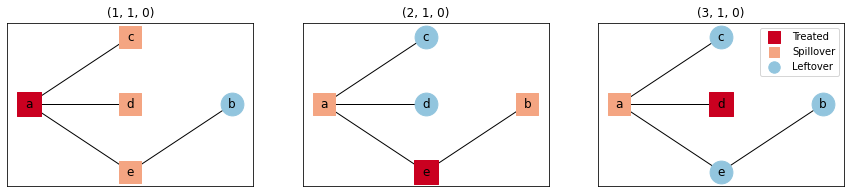

In [2]:
# For 1 treated
# if j = 1, should select A, C/D/E touched, only B leftover
# if j = 2, should select E, C/D not touched, A/B spillover
# if j = 3, should select C or D or B

check = [(1,1,0),(2,1,0),(3,1,0)]

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,3))
for i,c in enumerate(check):
    ch.plot_network(c,ax=ax[i],show=False)
    ax[i].set_title(c)

lg = ax[2].legend()
for h in lg.legendHandles:
    h.set_sizes(h.get_sizes()/4)

plt.show()

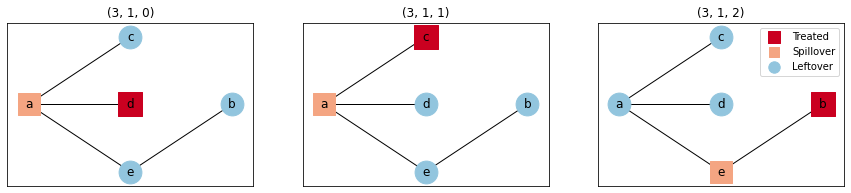

In [3]:
# A given set of constraints can potentially have multiple solutions
# with leftover 3, need to select D, C or B in this network
ch.solve_extra(3,1)

check = [(3,1,0),(3,1,1),(3,1,2)]

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,3))
for i,c in enumerate(check):
    ch.plot_network(c,ax=ax[i],show=False)
    ax[i].set_title(c)

lg = ax[2].legend()
for h in lg.legendHandles:
    h.set_sizes(h.get_sizes()/4)

plt.show()

In [4]:
# This uses a larger network from Rostami & Mondani,2015
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0119309

edges = pd.read_csv('Edges.csv')
nodes = pd.read_csv('Nodes.csv')


G = nx.Graph()
G.add_nodes_from(list(nodes['Node']))
G.add_edges_from(edges[['From','To']].to_numpy().tolist())

# Now solving for different number of treated selected
# This network has a total of 311 nodes
# for this network, takes a minute or two for each k
# each iteration is quick, but to draw the whole pareto curve
# takes awhile
bn = nxd.netDesign(G)
bn.solve_rangek([30,60,90])

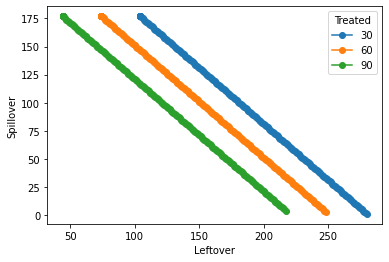

In [5]:
# Can look at the pareto curves for the different K's, there is tradeoffs in
# total selected and potentiall spillover vs leftover
df, ax = bn.pareto_graph(show=True,legend=True)

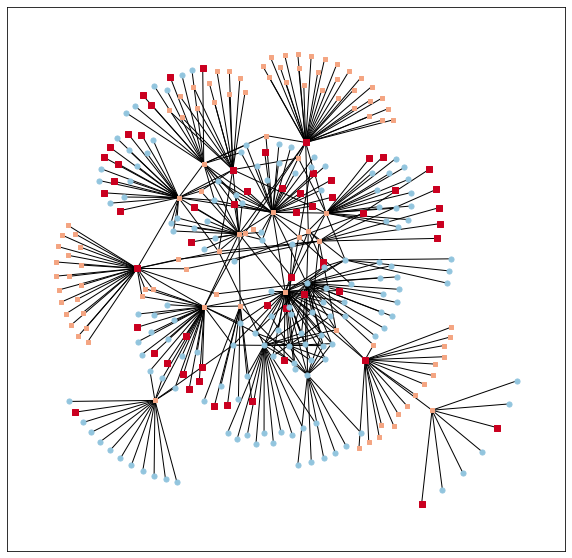

In [6]:
# Lets just pick a particular solution at treated=60 and leftover=150
bn.pos = nx.kamada_kawai_layout(G)
fig, ax = plt.subplots(figsize=(10,10))
sd = {'Treated': 30, 'Spillover': 23, 'Leftover': 26}
bn.plot_network((150,60,0),ax=ax,sizes=sd,show=True,labels=False)